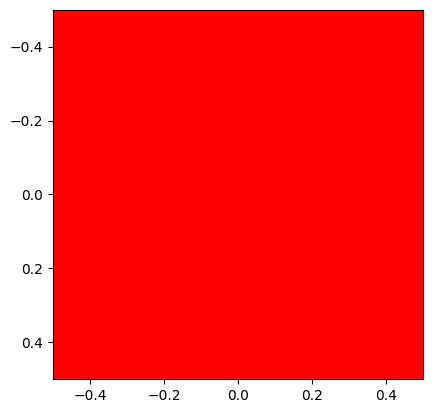

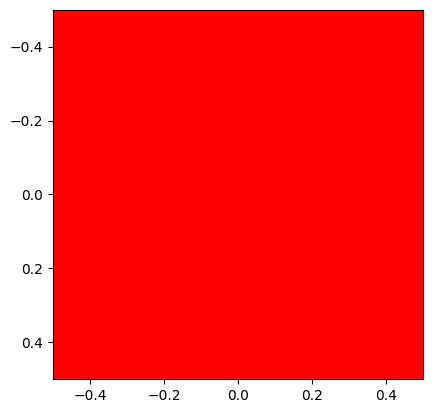

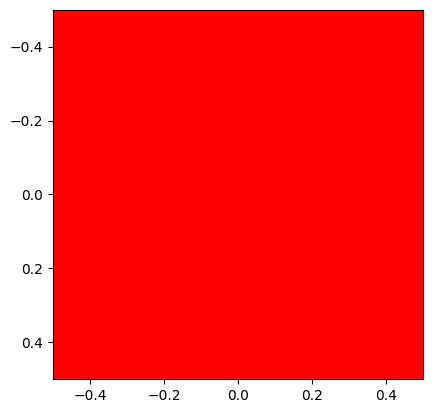

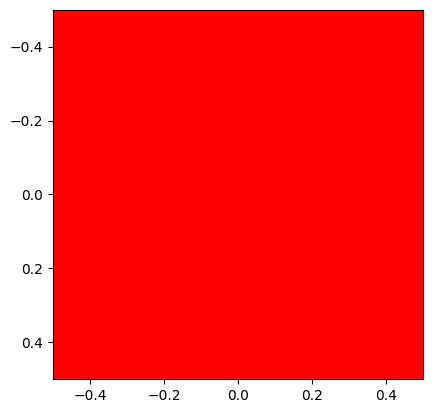

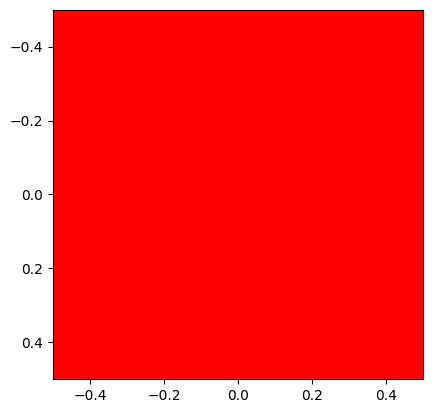

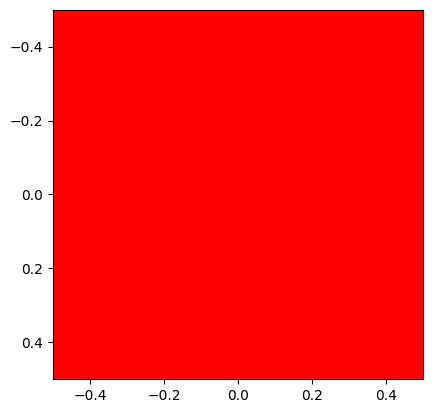

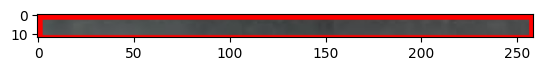

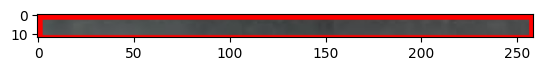

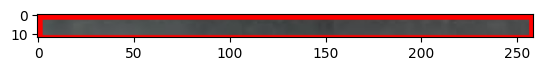

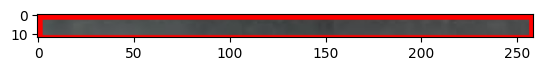

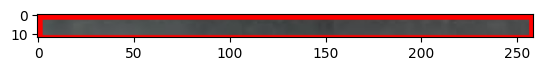

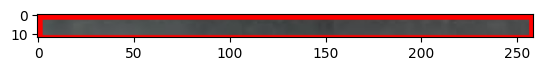

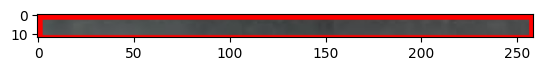

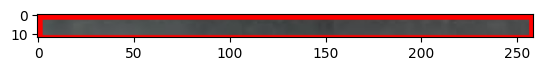

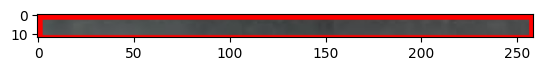

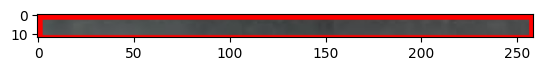

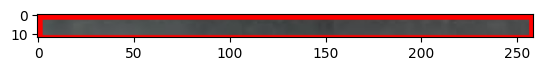

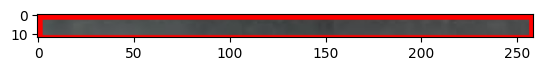

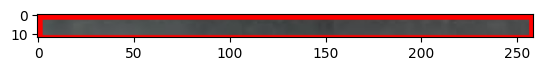

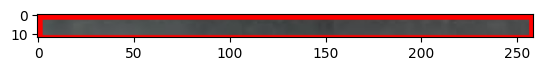

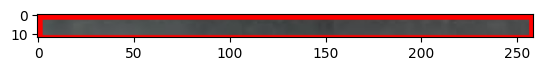

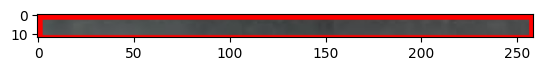

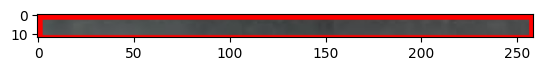

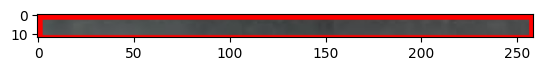

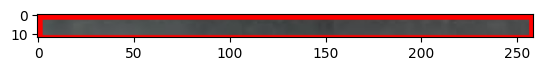

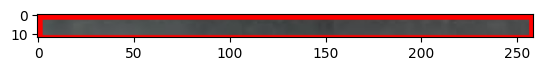

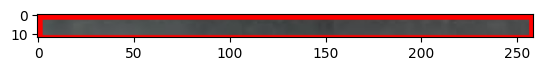

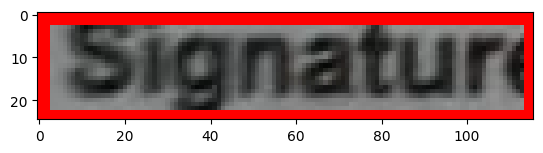

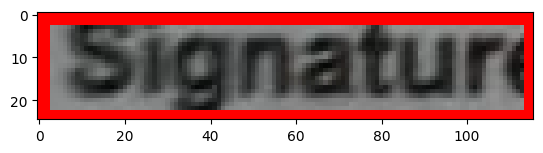

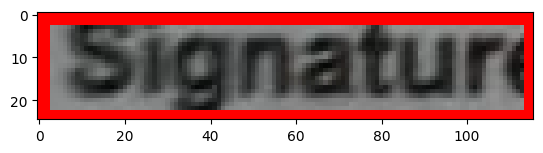

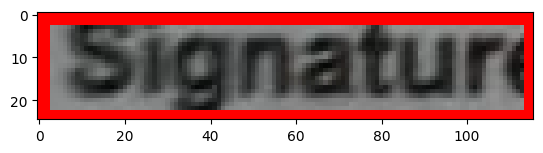

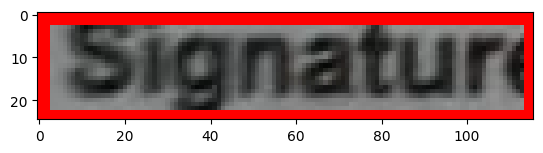

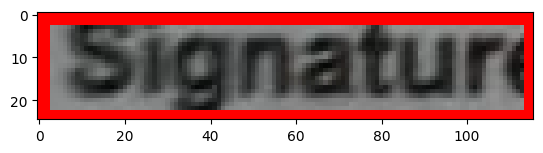

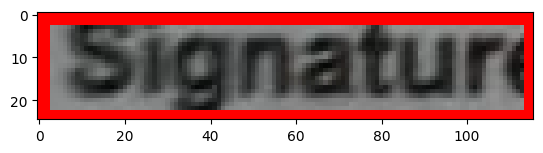

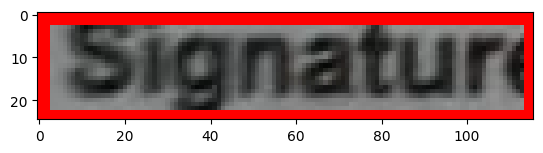

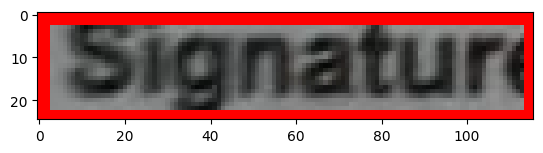

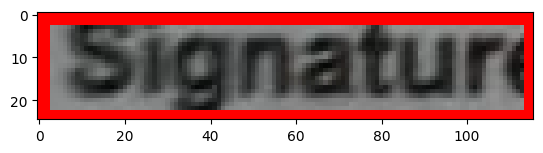

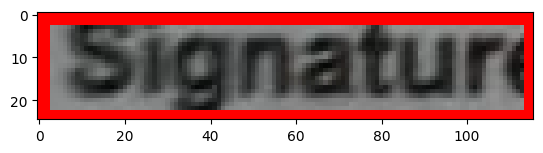

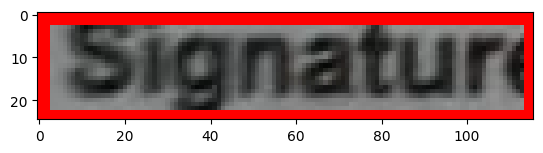

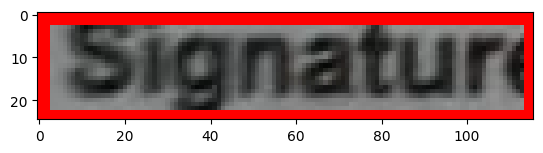

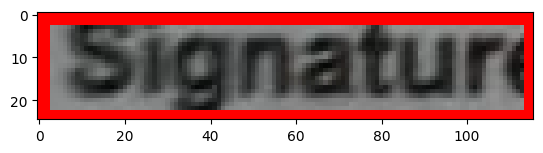

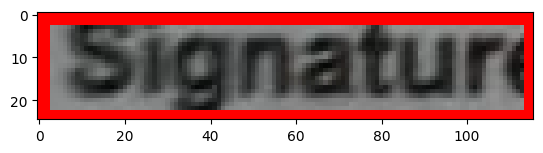

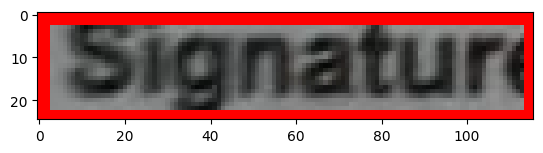

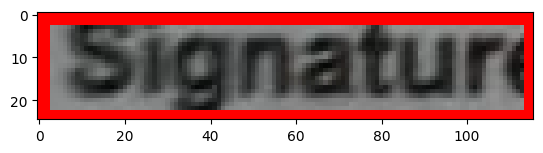

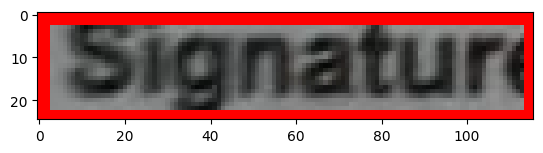

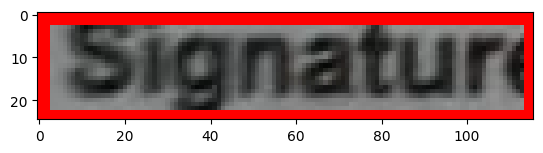

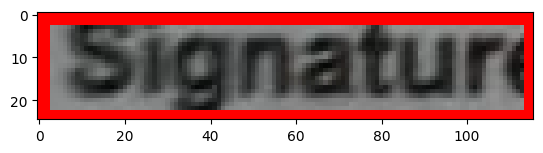

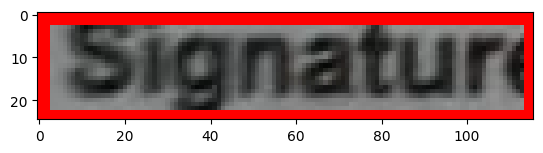

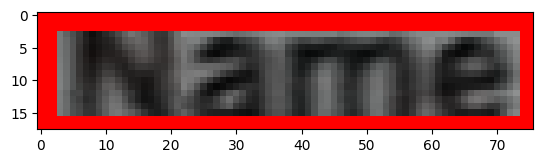

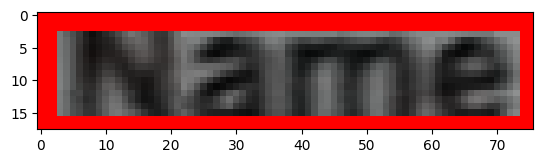

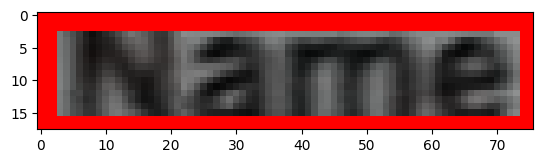

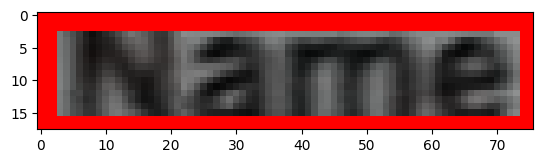

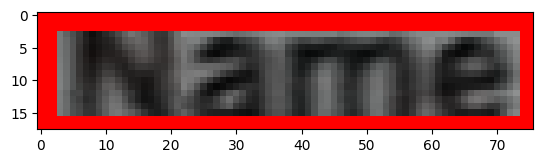

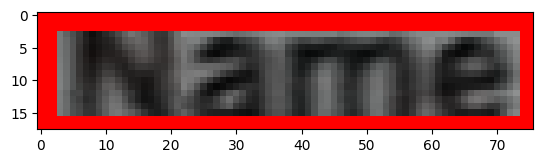

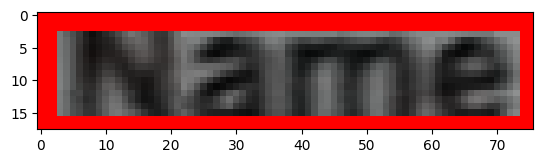

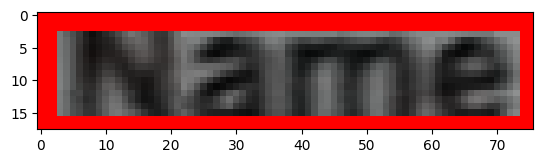

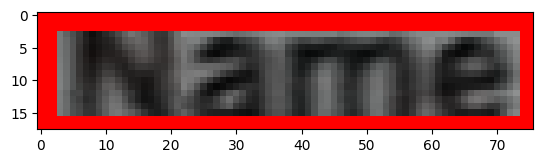

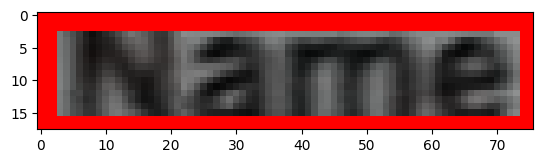

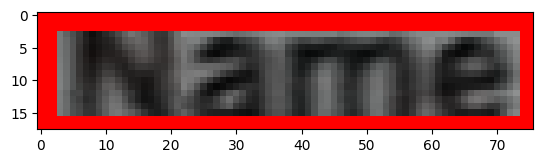

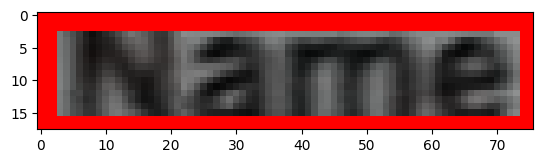

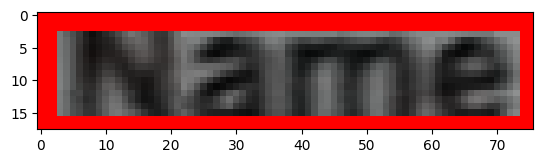

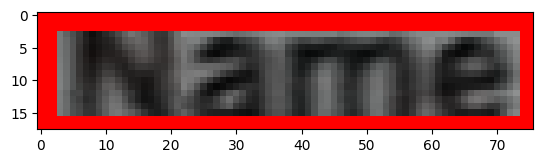

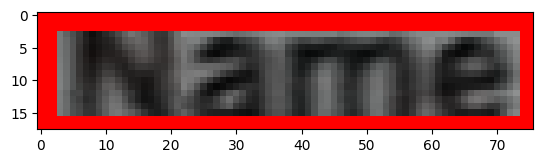

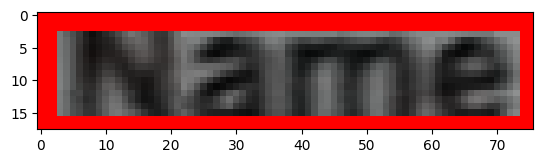

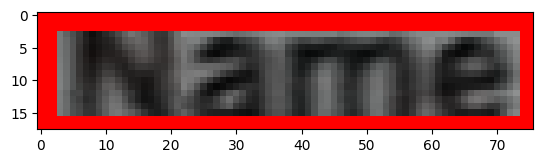

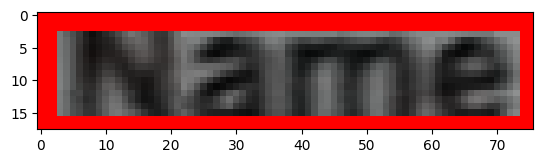

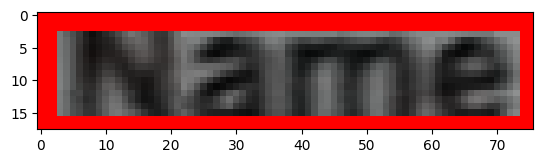

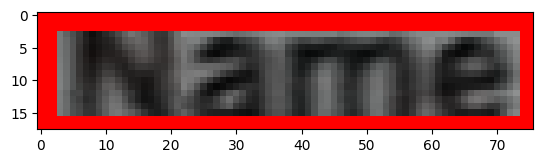

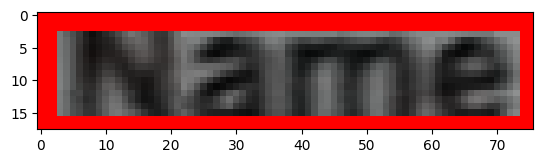

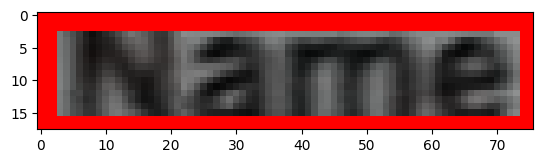

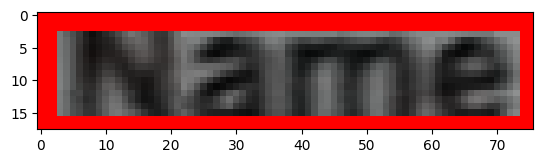

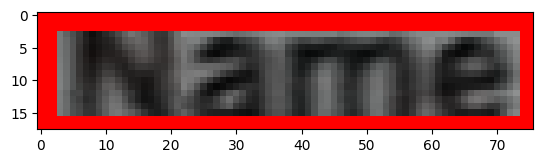

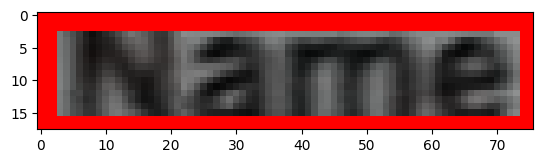

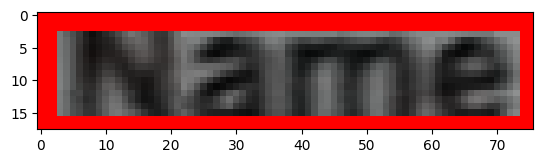

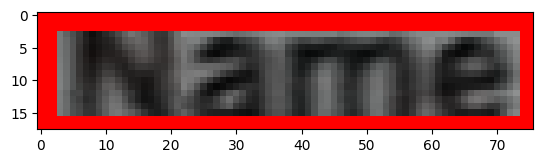

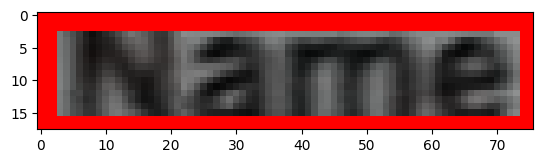

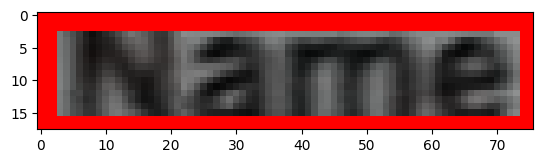

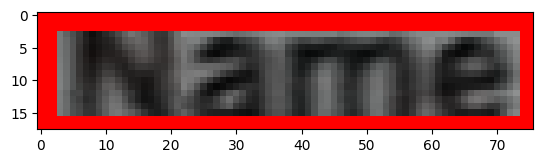

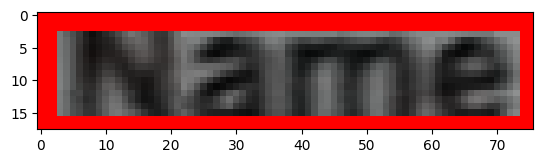

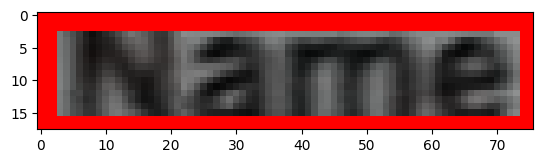

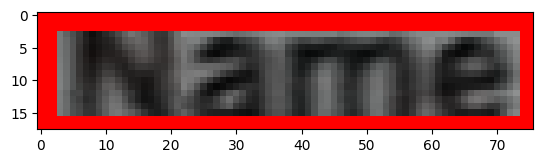

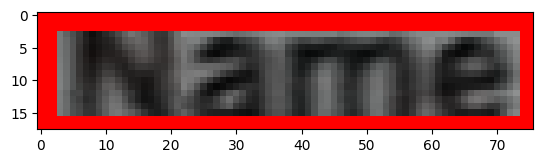

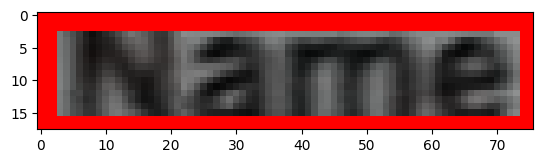

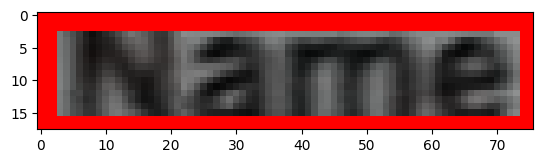

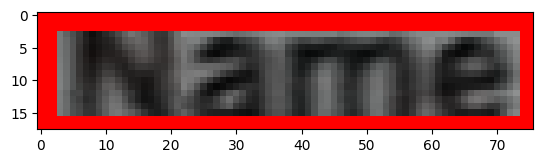

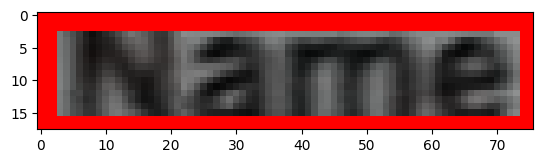

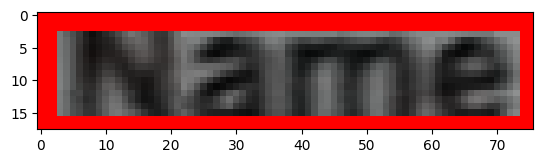

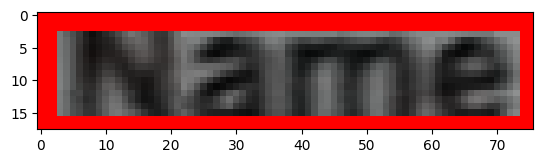

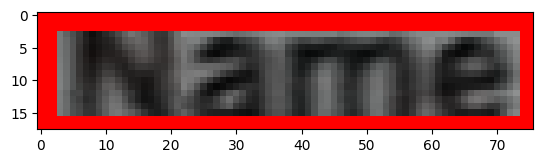

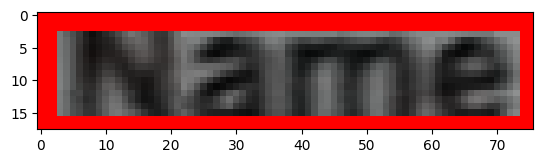

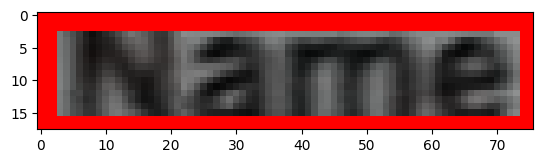

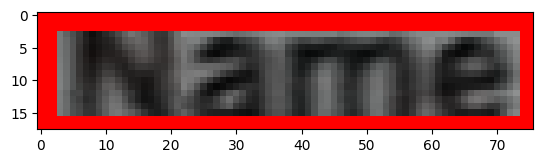

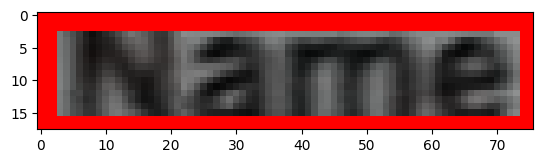

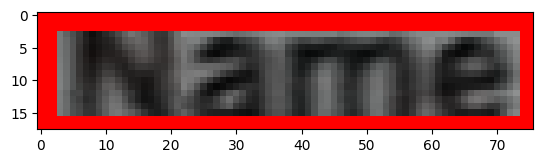

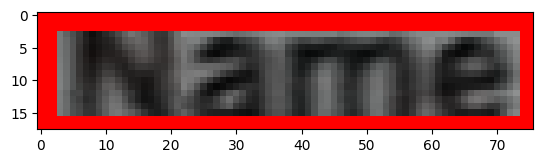

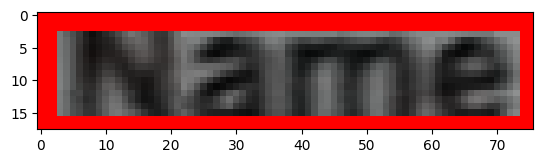

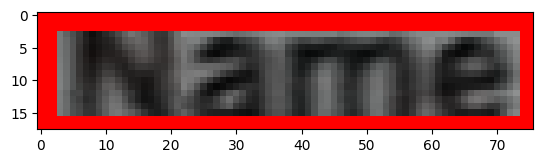

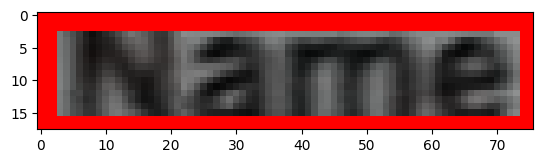

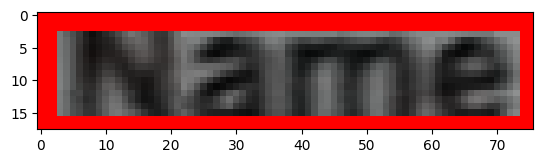

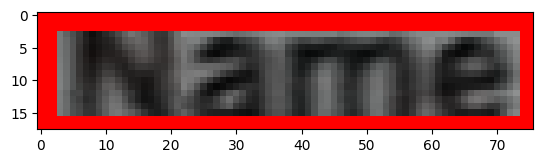

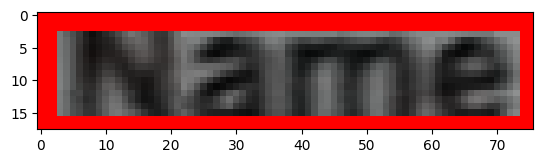

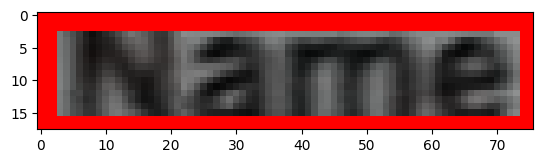

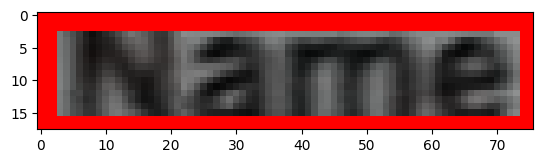

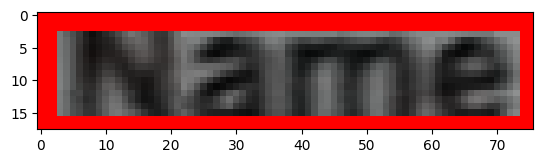

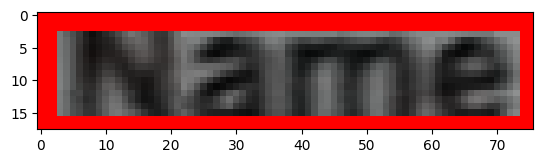

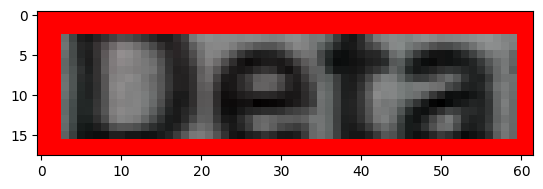

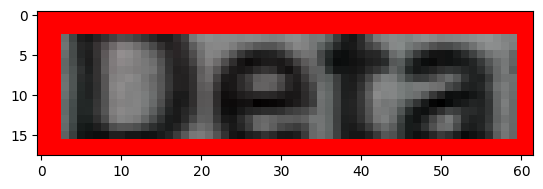

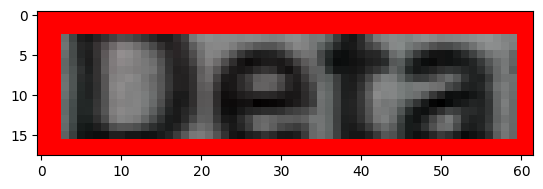

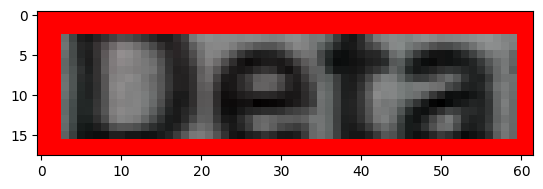

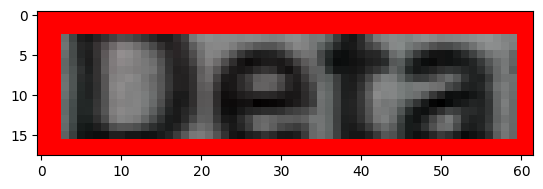

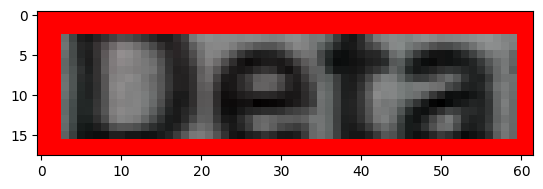

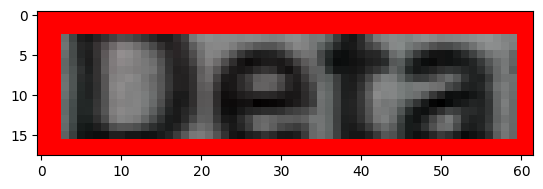

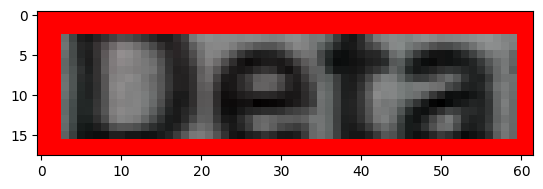

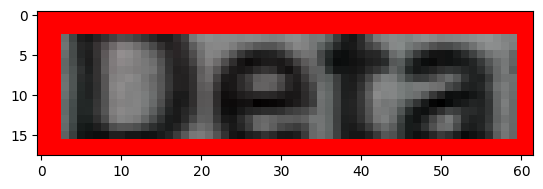

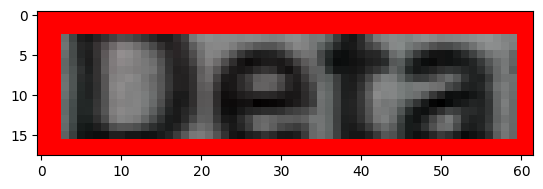

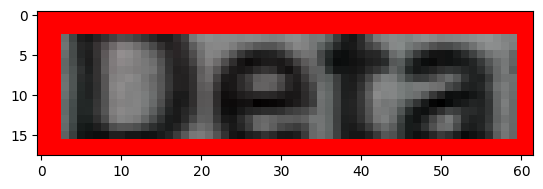

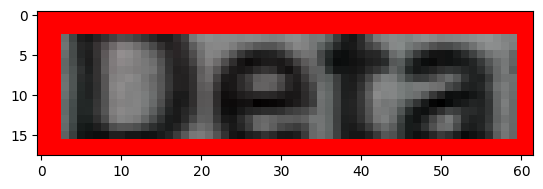

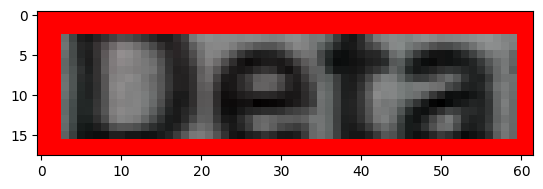

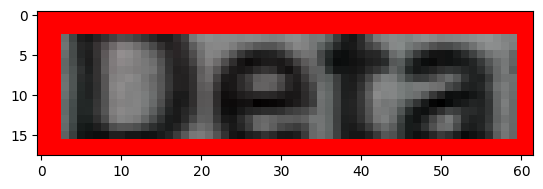

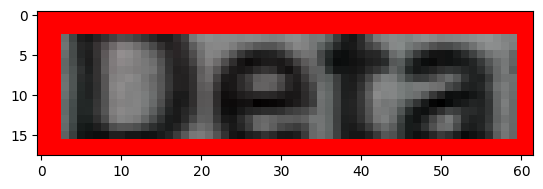

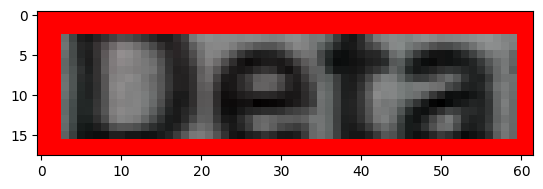

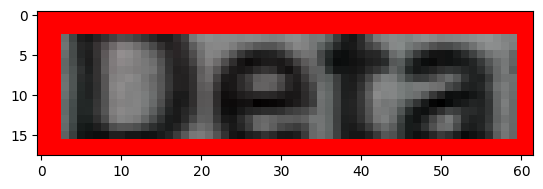

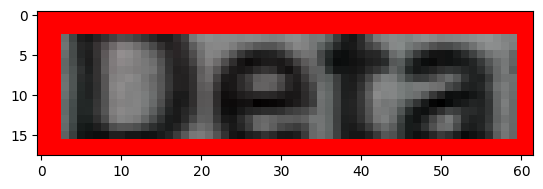

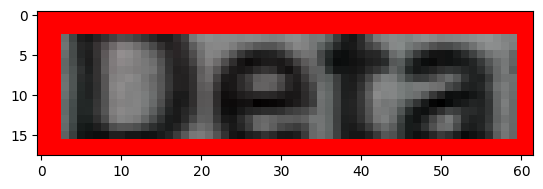

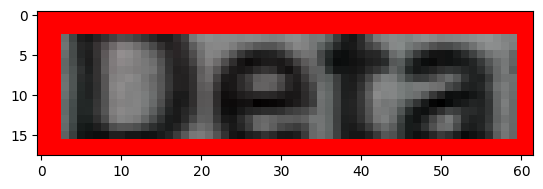

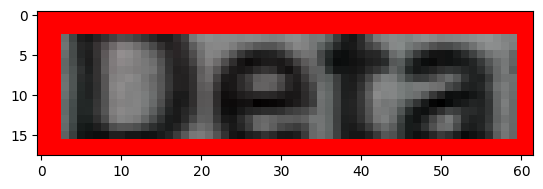

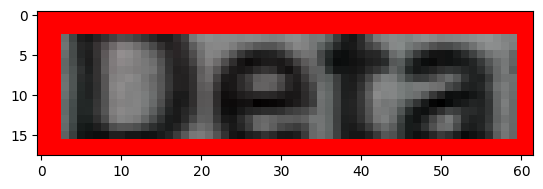

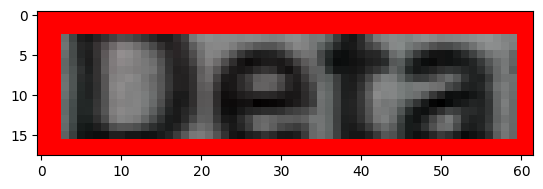

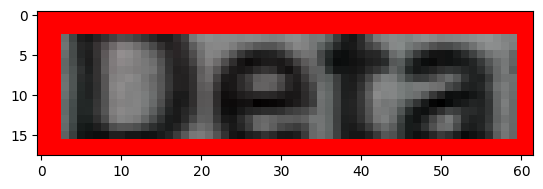

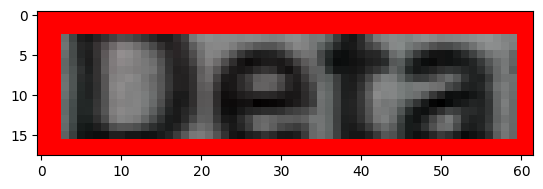

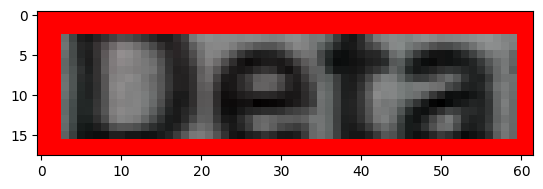

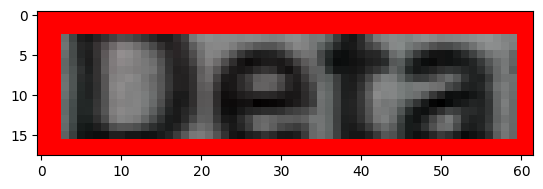

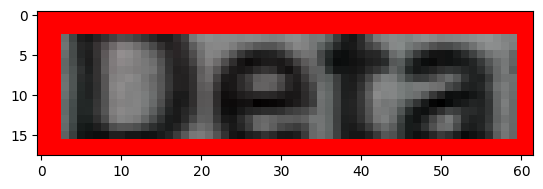

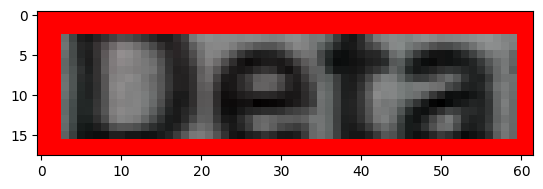

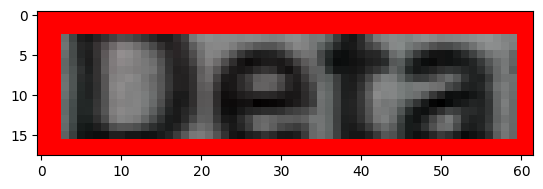

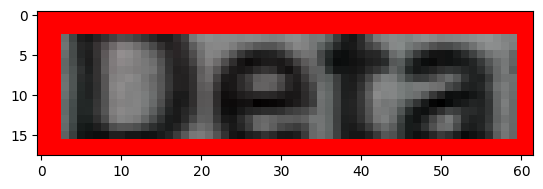

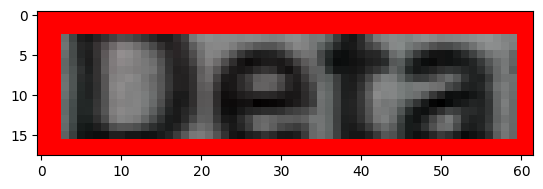

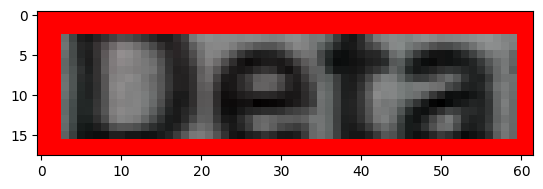

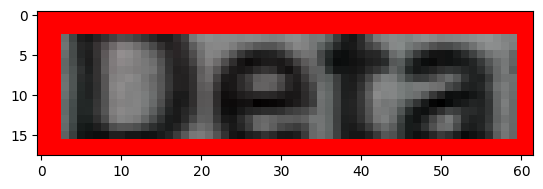

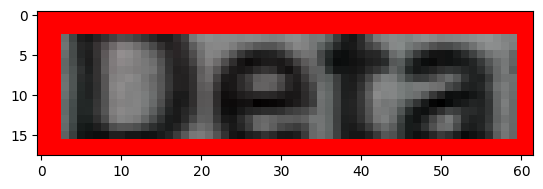

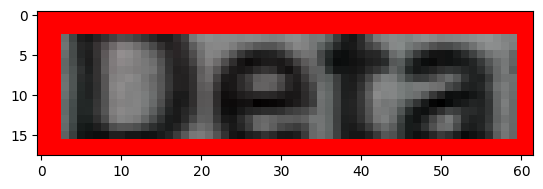

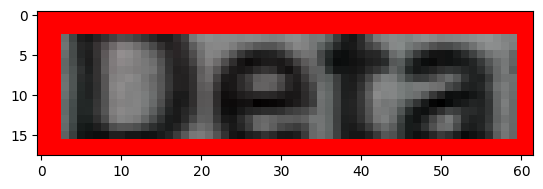

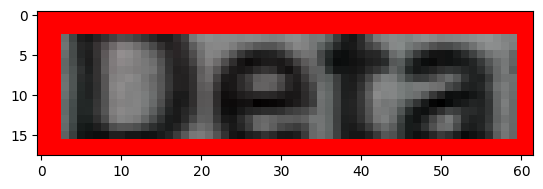

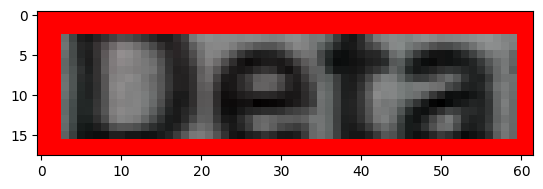

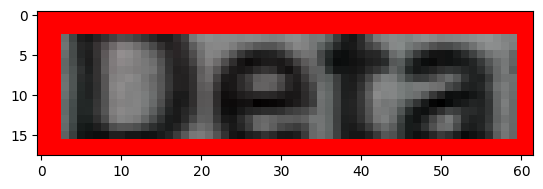

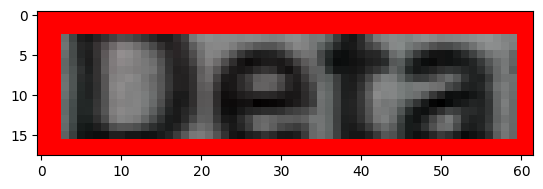

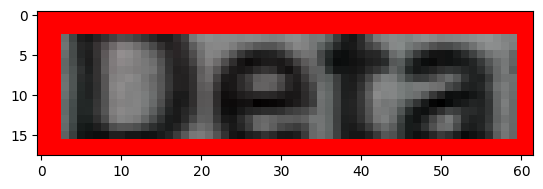

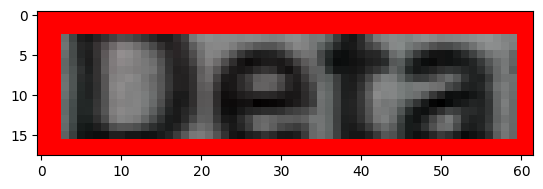

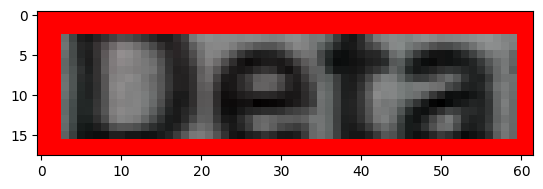

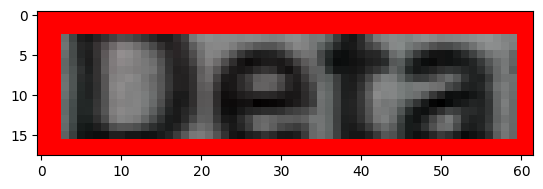

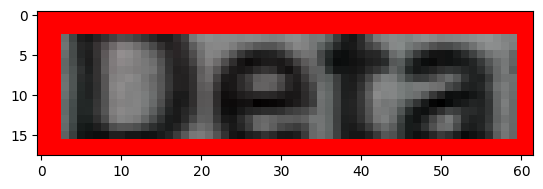

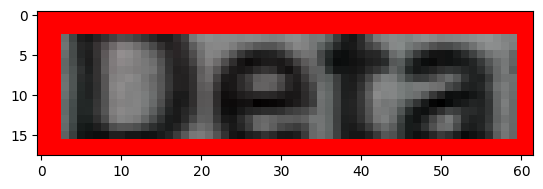

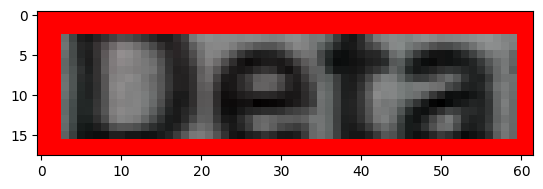

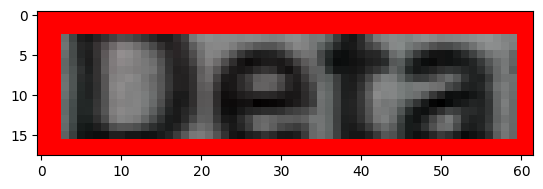

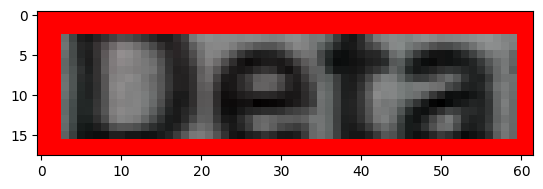

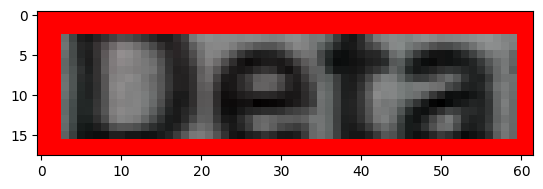

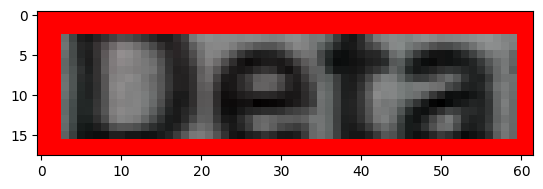

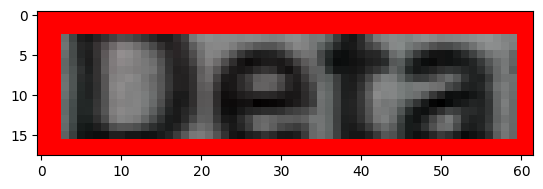

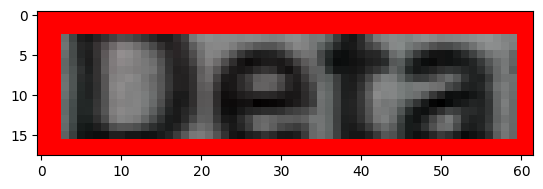

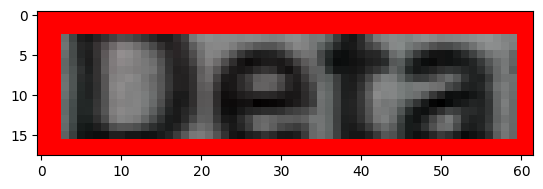

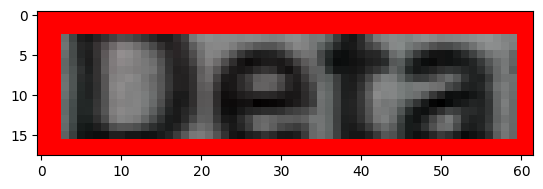

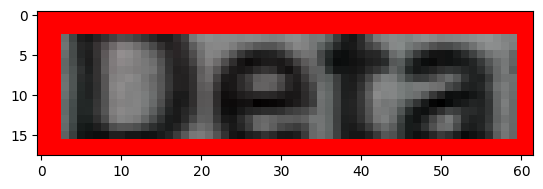

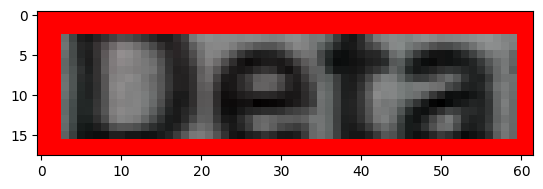

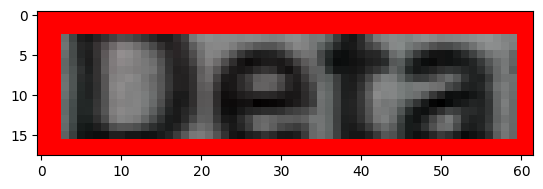

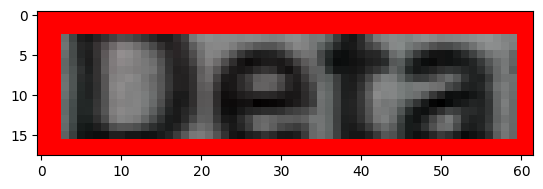

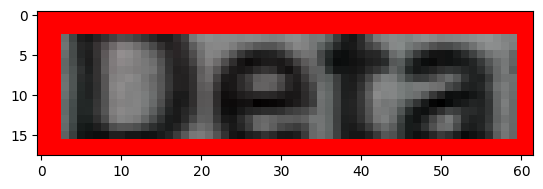

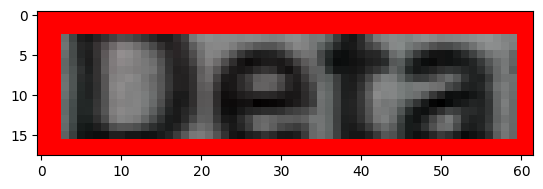

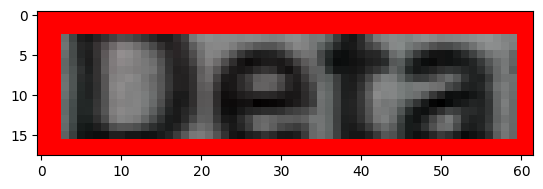

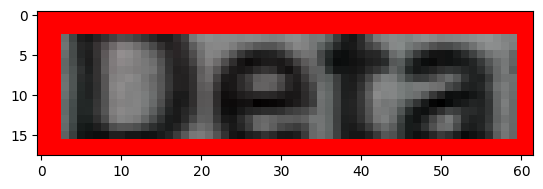

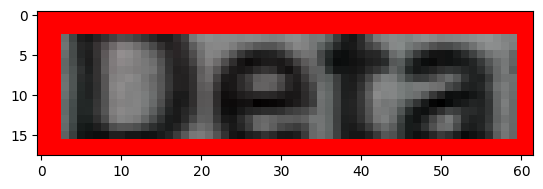

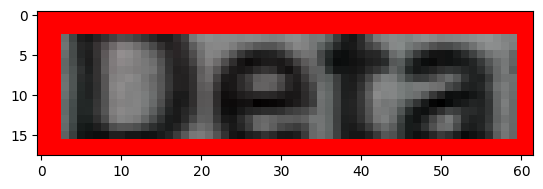

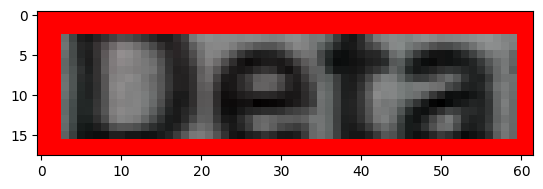

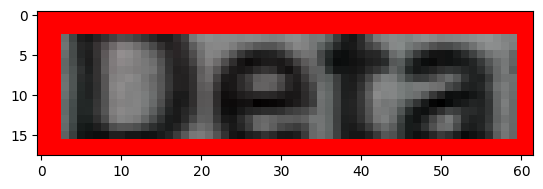

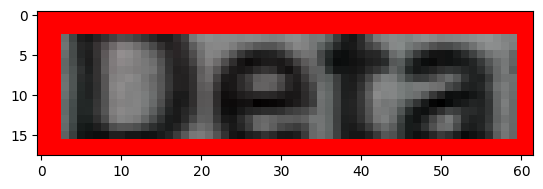

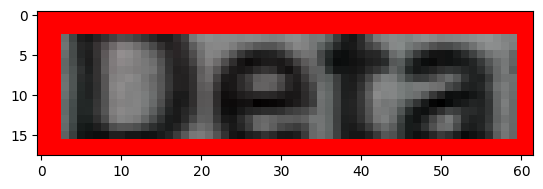

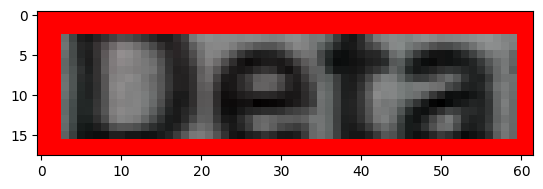

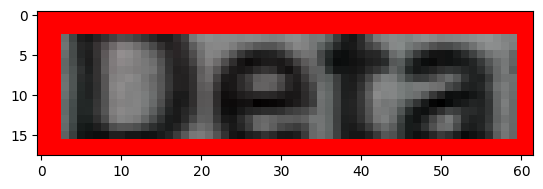

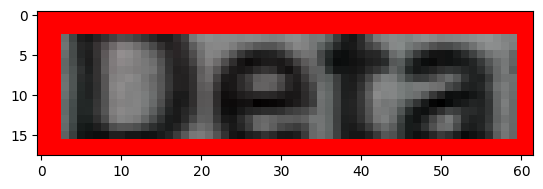

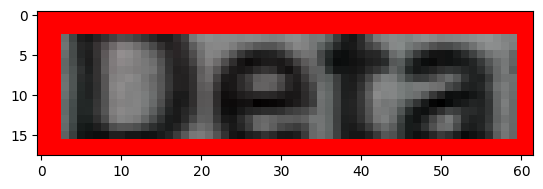

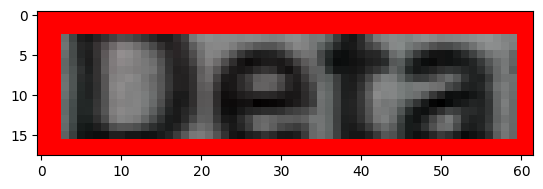

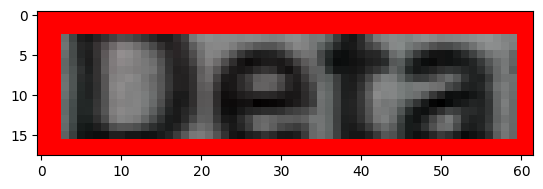

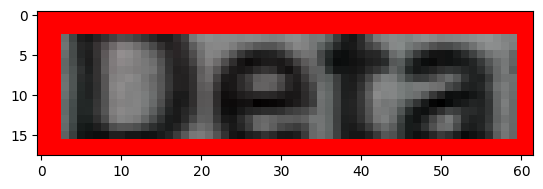

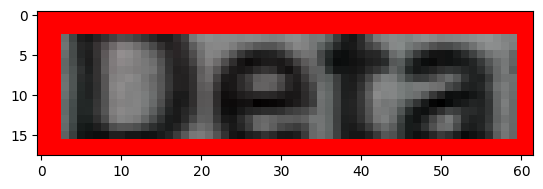

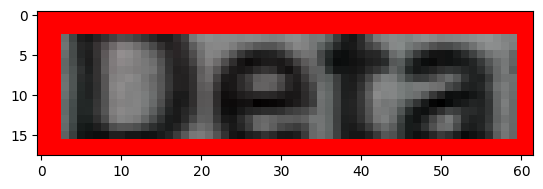

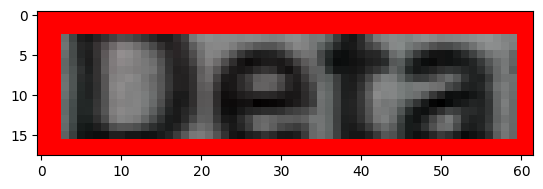

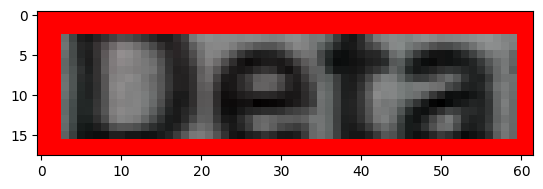

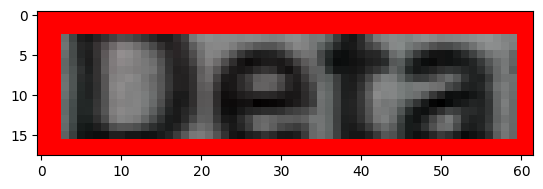

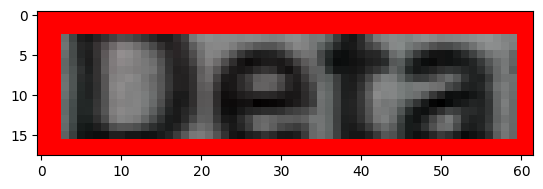

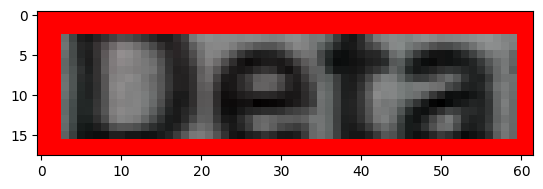

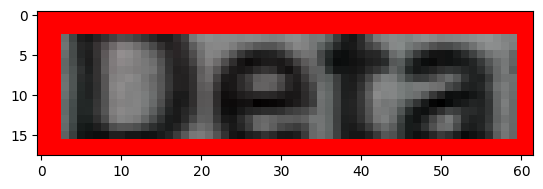

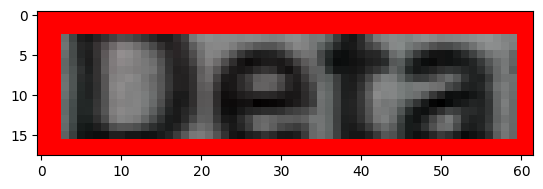

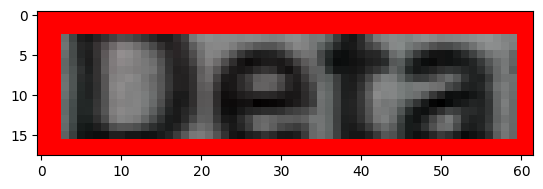

KeyboardInterrupt: 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def expand_bounding_box(image, contour, padding_factor):
    # Find the bounding box of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate the padding to expand the bounding box
    padding_x = int(padding_factor * w)
    padding_y = int(padding_factor * h)

    # Expand the bounding box by adding the padding
    expanded_x = max(0, x - padding_x)
    expanded_y = max(0, y - padding_y)
    expanded_w = min(image.shape[1] - 1, w + 2 * padding_x)
    expanded_h = min(image.shape[0] - 1, h + 2 * padding_y)

    return expanded_x, expanded_y, expanded_w, expanded_h

frames = cv2.imread("./test5.jpg")
stretch = frames.copy()  # Frame is the imported image

# Increasing the contrast of the image
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8, 8))
lab = cv2.cvtColor(stretch, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2, a, b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BG

# Convert to gray
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Blur
smooth = cv2.GaussianBlur(gray, (11, 11), 0)

img2 = cv2.cvtColor(smooth, cv2.COLOR_GRAY2BGR)

frame_HSV = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
frame_threshold = cv2.inRange(frame_HSV, (0, 0, 10), (180, 255, 80))

# Perform distance transform
dist_transform = cv2.distanceTransform(frame_threshold, cv2.DIST_L2, 3)
_, dist_threshold = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)
dist_threshold = dist_threshold.astype(np.uint8)

contours, hierarchy = cv2.findContours(dist_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)
largestContourArea = sorted_areas[-1] * 0.1
largestContour = 0

for cnt in contours:
    contourArea = cv2.contourArea(cnt)
    if contourArea > largestContourArea:
        # Expand the bounding box
        expanded_x, expanded_y, expanded_w, expanded_h = expand_bounding_box(frames, cnt, padding_factor=0.1)

    cv2.rectangle(frames, (expanded_x, expanded_y), (expanded_x + expanded_w, expanded_y + expanded_h),
                    (255, 0, 0), 4)

    ROI = frames[expanded_y:expanded_y + expanded_h, expanded_x:expanded_x + expanded_w]
    plt.imshow(ROI)
    plt.show()

cv2.drawContours(frames, contours, -1, (0, 150, 132), thickness=4)
plt.imshow(frames)
plt.show()
